In [4]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [201]:
a=[(24,21.54945196),(50,47.46446305),(15,17.21865634),(38,36.58639803),(87,87.28898389),(36,32.46387493),(12,10.78089683),(81,80.7633986),(25,24.61215147),(5,6.963319071),(16,11.23757338),(16,13.53290206),(24,24.60323899),(39,39.40049976),(54,48.43753838),(60,61.69900319),(26,26.92832418),(73,70.4052055),(29,29.34092408),(31,25.30895192),(68,69.02934339),(87,84.99484703),(58,57.04310305),(54,50.5921991),(84,83.02772202),(58,57.05752706),(49,47.95883341),(20,24.34226432),(90,94.68488281),(48,48.03970696),(4,7.08132338),(25,21.99239907),(42,42.33151664),(0,0.329089443),(60,61.92303698),(93,91.17716423),(39,39.45358014),(7,5.996069607),(21,22.59015942),(68,61.18044414),(84,85.02778957)]
a_x=[]
a_y=[]
for i in a:
    a_x.append(i[0])
    a_y.append(i[1])

In [179]:
a_x=[100.0,200.0,150.0,350.0]
a_y=[4050.0,8200.0,5800.0,12000.0]

In [193]:
# Load our data set
x_train = np.array([1, 2, 3, 4])   #features
y_train = np.array([300, 500, 950, 1200])   #target value

In [202]:
# Load our data set
x_train = np.array(a_x)   #features
y_train = np.array(a_y)   #target value

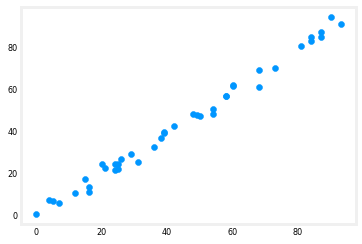

In [203]:
plt.scatter(x=x_train,y=y_train)

In [204]:
def cost_function(x,y,w,b):
    m=x.shape[0]
    total_cost_function = 0
    for i in range(m):
        j_wb=((w*x[i])+b-y[i])**2
        total_cost_function = total_cost_function+j_wb
    total_cost_function=total_cost_function*1/(2*m)
    return total_cost_function

3.2251964596360416
(18.488895632585464, 0.30722542973170863)


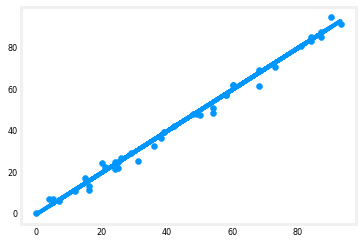

In [239]:
w=1
b=-0.365
print(cost_function(x_train,y_train,w,b))
print(gradient_solving_derivatives(x_train,y_train,w,b))
plt.scatter(x=x_train,y=y_train)
plt.plot(x_train,w*x_train+b)

In [206]:
def gradient_solving_derivatives(x,y,w,b):
    m=x.shape[0]
    dj_dw_total=0
    dj_db_total=0
    for i in range(m):
        dj_dw_i=((w*x[i])+b-y[i])*x[i]
        dj_db_i=((w*x[i])+b-y[i])
        dj_dw_total+=dj_dw_i
        dj_db_total+=dj_db_i
    dj_dw=dj_dw_total/m
    dj_db=dj_db_total/m
    return dj_dw,dj_db

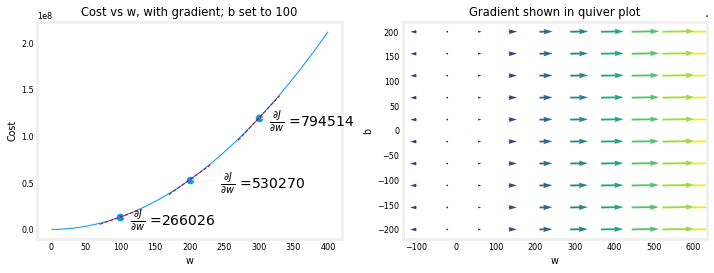

In [207]:
plt_gradients(x_train,y_train, cost_function, gradient_solving_derivatives)
plt.show()

In [208]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw,dj_db = gradient_solving_derivatives(x,y,w,b)
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [255]:
# initialize parameters
w_init = 10
b_init = 10
# some gradient descent settings
iterations = 100000
tmp_alpha = 1.0e-4
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, cost_function, gradient_solving_derivatives)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 6.03e+04  dj_dw:  2.426e+04, dj_db:  4.058e+02   w:  7.574e+00, b: 9.95942e+00
Iteration 10000: Cost 1.14e+01  dj_dw: -3.502e-02, dj_db:  2.108e+00   w:  8.635e-01, b: 7.42674e+00
Iteration 20000: Cost 7.94e+00  dj_dw: -2.672e-02, dj_db:  1.608e+00   w:  8.942e-01, b: 5.57994e+00
Iteration 30000: Cost 5.94e+00  dj_dw: -2.039e-02, dj_db:  1.227e+00   w:  9.176e-01, b: 4.17085e+00
Iteration 40000: Cost 4.78e+00  dj_dw: -1.556e-02, dj_db:  9.363e-01   w:  9.355e-01, b: 3.09575e+00
Iteration 50000: Cost 4.10e+00  dj_dw: -1.187e-02, dj_db:  7.143e-01   w:  9.491e-01, b: 2.27546e+00
Iteration 60000: Cost 3.71e+00  dj_dw: -9.056e-03, dj_db:  5.450e-01   w:  9.595e-01, b: 1.64959e+00
Iteration 70000: Cost 3.48e+00  dj_dw: -6.910e-03, dj_db:  4.159e-01   w:  9.675e-01, b: 1.17206e+00
Iteration 80000: Cost 3.35e+00  dj_dw: -5.272e-03, dj_db:  3.173e-01   w:  9.735e-01, b: 8.07714e-01
Iteration 90000: Cost 3.27e+00  dj_dw: -4.023e-03, dj_db:  2.421e-01   w:  9.781e-01, b: 5.2

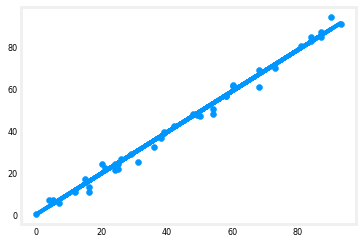

In [256]:
plt.scatter(x=x_train,y=y_train)
plt.plot(x_train,w_final*x_train+b_final)